In [67]:
import numpy as np
import pandas as pd
import itertools
import re
import os
import difflib
import random
import requests
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import operator

config_re = re.compile(r'\d+(?:,\d+)?')

In [255]:
#adding key, child, q value to dictonary or q table
def add_q(key,q_dict,q): #q is the q value
    if key in q_dict:
#         print('true')
        q_dict[key]= q
    else:
#         print('false')
        d_tmp = dict()
        q_dict[key]= q
    
    return q_dict

#get q value from dictonary or q table
def get_q(key,q_dict):
    if key in q_dict:
#         print('true')
        q = q_dict[key]
    
        return q
    
    else:
        return 'nan'
        
#store dictonary or q table
def q_store(file_name,q_table):
    pickle_out =  open(file_name+".pickle",'wb')
    pickle.dump(q_table,pickle_out)
    pickle_out.close()
    
    
#load stored dictonary or q table
def q_load(file_name):
    pickle_in = open(file_name+".pickle","rb")
    tmp_dict = pickle.load(pickle_in)
#     print(tmp_dict)
    return tmp_dict

In [256]:
#hidden layers for LSTM
history_path ='logs/'
file_name = history_path+'mlstm00'
obj = q_load(file_name)

layer_list_LSTM = []
for i in obj:
    key = i
    tmp = np.array(config_re.findall(key)).astype(int)
    layer_list_LSTM.append([tmp[0]+tmp[2],np.mean(obj[i]['val_loss']),np.mean(obj[i]['time'])]) #get hidden layer config

In [257]:
df_tmp = pd.DataFrame(layer_list_LSTM)

In [258]:
df_tmp.columns = ['Layers','Vloss','Time']

In [259]:
#hidden layers for BI-LSTM
history_path ='logs/'
file_name = history_path+'mbilstm00'
obj = q_load(file_name)

layer_list_bilstm = []
for i in obj:
    key = i
    tmp = np.array(config_re.findall(key)).astype(int)
    layer_list_bilstm.append(tmp[0]+tmp[2])

In [260]:
layer_compare=pd.DataFrame()
layer_compare['lstm'] = layer_list_LSTM
layer_compare=layer_compare.join(pd.DataFrame(layer_list_bilstm))
layer_compare.columns = ['LSTM','Bi-LSTM']

In [261]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

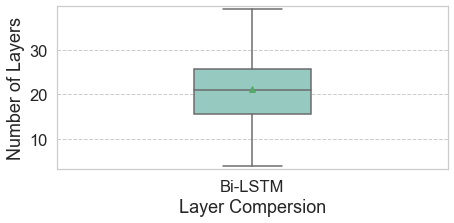

In [262]:
ax = plt.figure(figsize=(7,3))
ax = sns.boxplot(data=layer_compare, palette="Set3",showmeans=True,showfliers=False,width=0.3)
ax = plt.xlabel('Layer Compersion')
ax = plt.ylabel('Number of Layers')

plt.margins(0.02)
plt.savefig('Plots/min_vloss_layer.png',dpi=300, bbox_inches = 'tight')

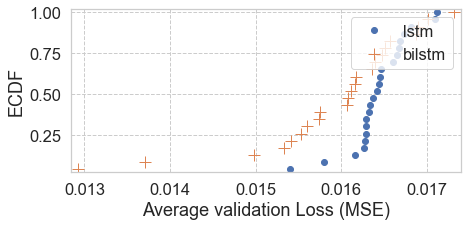

In [329]:
history_path ='logs/'
file_name = history_path+'mbilstm00'
obj = q_load(file_name)

df_tmp = pd.DataFrame()
val_loss_list = []
for i in obj:
    val_loss_list.append(np.mean(obj[i]['val_loss']))
df_tmp['bilstm'] =val_loss_list    


history_path ='logs/'
file_name = history_path+'mlstm00'
obj = q_load(file_name)

df_tmp2 = pd.DataFrame()
val_loss_list = []
for i in obj:
    val_loss_list.append(np.mean(obj[i]['val_loss']))
df_tmp2['lstm'] =val_loss_list     
# pd.DataFrame(val_loss_list).boxplot()

df_fig=df_tmp2.join(df_tmp)


x = np.sort(df_fig['lstm'])
x2 = np.sort(df_fig['bilstm'])
# y = np.arange(1,len(x)+1)/len(x)
y = np.arange(1, len(x)+1) / float(len(x))
y2 = np.arange(1, len(x2)+1) / float(len(x2))
ax = plt.figure(figsize=(7,3))
ax = plt.plot(x,y, marker ='.',linestyle='none',markersize=12)
ax = plt.plot(x2,y2, marker ='+',linestyle='none',markersize=12)
ax = plt.xlabel('Average validation Loss (MSE)')
ax = plt.ylabel('ECDF')

plt.margins(0.02)
plt.legend(['lstm','bilstm'],loc='upper right')
plt.savefig('Plots/min_vloss.png',dpi=300, bbox_inches = 'tight')

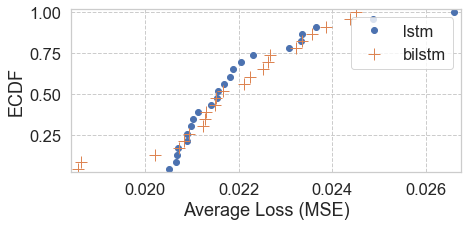

In [330]:
history_path ='logs/'
file_name = history_path+'mbilstm00'
obj = q_load(file_name)
df_tmp = pd.DataFrame()
val_loss_list = []
for i in obj:
    val_loss_list.append(np.mean(obj[i]['loss']))
df_tmp['bilstm'] =val_loss_list    


history_path ='logs/'
file_name = history_path+'mlstm00'
obj = q_load(file_name)
df_tmp2 = pd.DataFrame()
val_loss_list = []
for i in obj:
    val_loss_list.append(np.mean(obj[i]['loss']))
df_tmp2['lstm'] =val_loss_list     
# pd.DataFrame(val_loss_list).boxplot()

df_fig=df_tmp2.join(df_tmp)


x = np.sort(df_fig['lstm'])
x2 = np.sort(df_fig['bilstm'])
# y = np.arange(1,len(x)+1)/len(x)
y = np.arange(1, len(x)+1) / float(len(x))
y2 = np.arange(1, len(x2)+1) / float(len(x2))
ax = plt.figure(figsize=(7,3))
ax = plt.plot(x,y, marker ='.',linestyle='none',markersize=12)
ax = plt.plot(x2,y2, marker ='+',linestyle='none',markersize=12)
ax = plt.xlabel('Average Loss (MSE)')
ax = plt.ylabel('ECDF')

plt.margins(0.02)
plt.legend(['lstm','bilstm'],loc='upper right')
plt.savefig('Plots/min_loss.png',dpi=300, bbox_inches = 'tight')

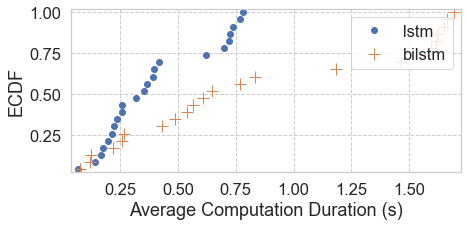

In [331]:
history_path ='logs/'
file_name = history_path+'mbilstm00'
obj = q_load(file_name)
df_tmp = pd.DataFrame()
val_loss_list = []
for i in obj:
    val_loss_list.append(np.mean(obj[i]['time']))
df_tmp['bilstm'] =val_loss_list    


history_path ='logs/'
file_name = history_path+'mlstm00'
obj = q_load(file_name)
df_tmp2 = pd.DataFrame()
val_loss_list = []
for i in obj:
    val_loss_list.append(np.mean(obj[i]['time']))
df_tmp2['lstm'] =val_loss_list     
# pd.DataFrame(val_loss_list).boxplot()

df_fig=df_tmp2.join(df_tmp)


x = np.sort(df_fig['lstm'])
x2 = np.sort(df_fig['bilstm'])
# y = np.arange(1,len(x)+1)/len(x)
y = np.arange(1, len(x)+1) / float(len(x))
y2 = np.arange(1, len(x2)+1) / float(len(x2))
ax = plt.figure(figsize=(7,3))
ax = plt.plot(x,y, marker ='.',linestyle='none',markersize=12)
ax = plt.plot(x2,y2, marker ='+',linestyle='none',markersize=12)
ax = plt.xlabel('Average Computation Duration (s)')
ax = plt.ylabel('ECDF')

plt.margins(0.02)
plt.legend(['lstm','bilstm'],loc='upper right')
plt.savefig('Plots/min_compute.png',dpi=300, bbox_inches = 'tight')

In [332]:
history_path ='logs/'
file_name = history_path+'round00'
obj = q_load(file_name)

In [333]:
round_loss = pd.DataFrame()
for i in obj:
    key =list(obj[i].keys())[0]
    round_loss[i]=obj[i][key]['val_loss']
    
#     append(np.mean(obj[i][key]['val_loss']))

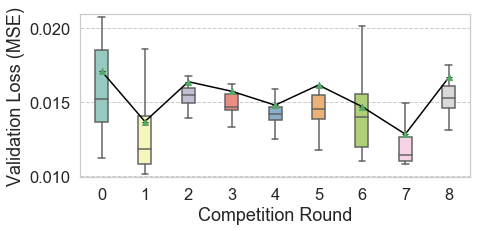

In [334]:
ax = plt.figure(figsize=(7,3))
ax = sns.boxplot(data=round_loss, palette="Set3",showmeans=True,showfliers=False,width=0.3)
ax = plt.plot(round_loss.mean(),marker ='+',color = 'black')
ax = plt.xlabel('Competition Round')
ax = plt.ylabel('Validation Loss (MSE)')

plt.margins(0.02)
plt.savefig('Plots/min_vloss_round.png',dpi=300, bbox_inches = 'tight')

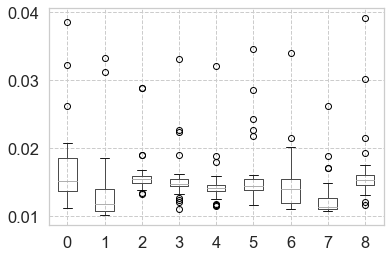

In [335]:
round_loss.boxplot()

In [309]:
history_path ='logs/'
file_name = history_path+'round00'
obj = q_load(file_name)

lstm_layer = []
dense_layer = []
lstm_cell = []
dense_neu = []
round_loss = pd.DataFrame()
for i in obj:
    key =list(obj[i].keys())[0]
    tmp = np.array(config_re.findall(key)).astype(int)
    lstm_layer.append(tmp[0])
    dense_layer.append(tmp[2])
    lstm_cell.append(tmp[1])
    for j in tmp[3:]:
        dense_neu.append(j)



In [310]:

config_fig=pd.DataFrame()

config_fig['LSTM layer'] = lstm_layer

tmp= pd.DataFrame()
tmp['LSTM cell'] = lstm_cell
config_fig = config_fig.join(tmp)

tmp= pd.DataFrame()
tmp['Dense layer'] = dense_layer
config_fig=config_fig.join(tmp)

tmp= pd.DataFrame()
tmp['Dense Neural'] = dense_neu
config_fig = config_fig.join(tmp)

In [311]:
config_fig

,LSTM layer,LSTM cell,Dense layer,Dense Neural
0,10,251,12,130
1,3,115,1,188
2,1,64,3,112
3,20,247,19,169
4,7,247,19,86
5,7,247,19,68
6,2,116,9,191
7,2,116,9,41


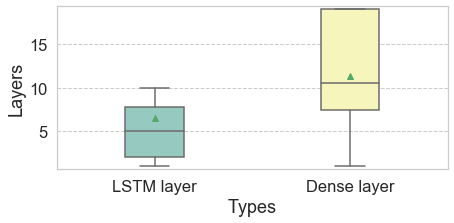

In [314]:
ax = plt.figure(figsize=(7,3))
ax = sns.boxplot(data=config_fig[['LSTM layer','Dense layer']] ,palette="Set3",showmeans=True,showfliers=False,width=0.3)
ax = plt.xlabel('Types')
ax = plt.ylabel('Layers')

plt.margins(0.02)
plt.savefig('Plots/min_vloss_rnnconfig_layer2.png',dpi=300, bbox_inches = 'tight')

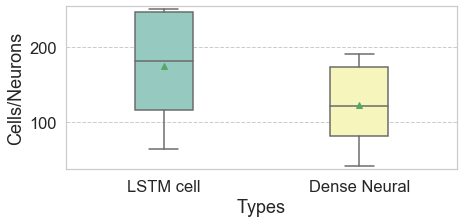

In [315]:
ax = plt.figure(figsize=(7,3))
ax = sns.boxplot(data=config_fig[['LSTM cell','Dense Neural']] ,palette="Set3",showmeans=True,showfliers=False,width=0.3)
ax = plt.xlabel('Types')
ax = plt.ylabel('Cells/Neurons')

plt.margins(0.02)
plt.savefig('Plots/min_vloss_rnnconfig_cells2.png',dpi=300, bbox_inches = 'tight')